<a href="https://colab.research.google.com/github/vinay18082004/SCT_DS_3/blob/main/TASK03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 03

build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data . use dataset such as banking marketing dataset from the UCI machine learning repository

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/bank.csv", sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
# Preprocess data
data_encoded = pd.get_dummies(df.drop('y', axis=1))
target = df['y'].map({'yes': 1, 'no': 0})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target, test_size=0.3, random_state=42)

In [6]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8916728076639646
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1205
           1       0.53      0.26      0.35       152

    accuracy                           0.89      1357
   macro avg       0.72      0.61      0.64      1357
weighted avg       0.87      0.89      0.87      1357

Confusion Matrix:
 [[1171   34]
 [ 113   39]]


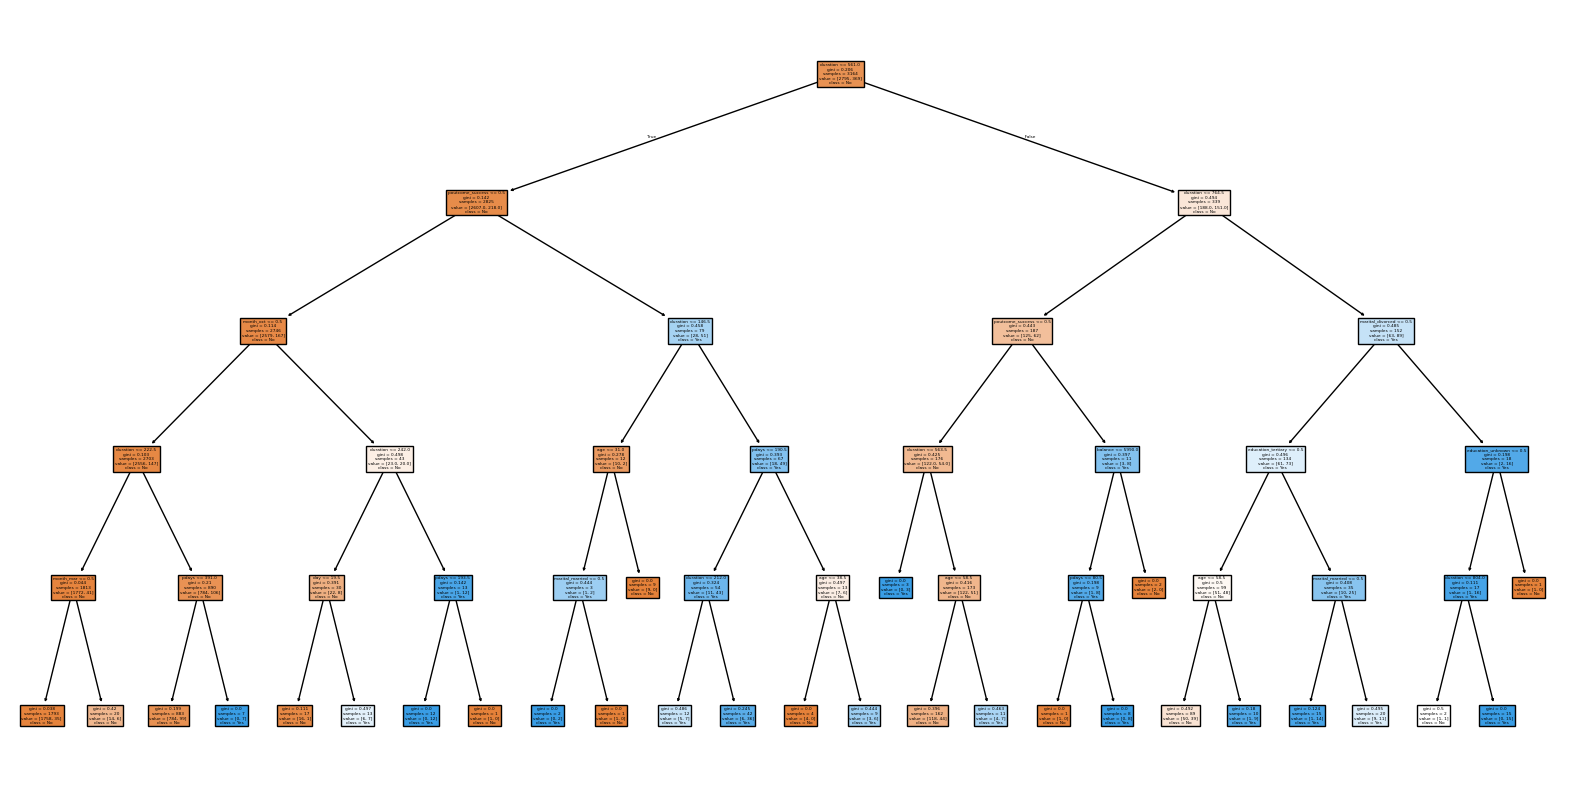

In [9]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=data_encoded.columns, class_names=["No", "Yes"], filled=True)
plt.show()